# IMPORT DATA

In [1]:
# importing all libraries
import pandas as pd                                   # data science essentials
import matplotlib.pyplot as plt                       # data visualization
import seaborn as sns                                 # enhanced data visualization
import numpy as np                                    # numpy for math
from sklearn.model_selection import train_test_split  # train-test split
from sklearn.linear_model import LogisticRegression   # logistic regression
import statsmodels.formula.api as smf                 # logistic regression
from sklearn.metrics import confusion_matrix          # confusion matrix
from sklearn.metrics import roc_auc_score             # auc score
from sklearn.neighbors import KNeighborsClassifier    # KNN for classification
from sklearn.neighbors import KNeighborsRegressor     # KNN for regression
from sklearn.preprocessing import StandardScaler      # standard scaler

# CART model packages
from sklearn.tree import DecisionTreeClassifier       # classification trees
from sklearn.tree import export_graphviz              # exports graphics
from six import StringIO                              # saves objects in memory
from IPython.display import Image                     # displays on frontend
import pydotplus                                      # interprets dot objects

# new packages
from sklearn.model_selection import RandomizedSearchCV  # hyperparameter tuning
from sklearn.metrics import make_scorer                 # customizable scorer
from sklearn.ensemble import RandomForestClassifier     # random forest
from sklearn.ensemble import GradientBoostingClassifier # gbm

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# specifying the path and file name
file = 'Apprentice_Chef_Dataset.xlsx'


# reading the file into Python
df = pd.read_excel(io=file)

# DEFINED FUNCTION


In [2]:
#########################
# text_split_feature
#########################
def text_split_feature(col, df, sep=' ', new_col_name='number_of_names'):
    """
Splits values in a string Series (as part of a DataFrame) and sums the number
of resulting items. Automatically appends summed column to original DataFrame.

PARAMETERS
----------
col          : column to split
df           : DataFrame where column is located
sep          : string sequence to split by, default ' '
new_col_name : name of new column after summing split, default
               'number_of_names'
"""
    
    df[new_col_name] = 0
    
    
    for index, val in df.iterrows():
        df.loc[index, new_col_name] = len(df.loc[index, col].split(sep = ' '))

In [3]:
########################################
# display_tree
########################################
def display_tree(tree, feature_df, height = 500, width = 800):
    """
    PARAMETERS
    ----------
    tree       : fitted tree model object
        fitted CART model to visualized
    feature_df : DataFrame
        DataFrame of explanatory features (used to generate labels)
    height     : int, default 500
        height in pixels to which to constrain image in html
    width      : int, default 800
        width in pixels to which to constrain image in html
    """

    # visualizing the tree
    dot_data = StringIO()

    # exporting tree to graphviz
    export_graphviz(decision_tree      = tree,
                    out_file           = dot_data,
                    filled             = True,
                    rounded            = True,
                    special_characters = True,
                    feature_names      = feature_df.columns)


    # declaring a graph object
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())


    # creating image
    img = Image(graph.create_png(),
                height = height,
                width  = width)
    
    return img

########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = x_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(pd.np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')


# Feature engineer


## Creat 0-1 variables

In [4]:
# dummy variable for having feature
df['HAS_PHOTOS']               = 0
df['HAS_CANCEL_BEFORE_NOON']   = 0
df['HAS_CANCEL_AFTER_NOON']    = 0
df['HAS_CLASS']                = 0
df['HAS_WEEKLY_PLAN']          = 0
df['HAS_EARLY_DELIVERY']       = 0
df['HAS_LATE_DELIVERY']        = 0

# iterating over each original column to
# change values in the new feature columns
for index, value in df.iterrows():
    
    # TOTAL_PHOTOS_VIEWED
    if df.loc[index, 'TOTAL_PHOTOS_VIEWED'] > 0:
        df.loc[index, 'HAS_PHOTOS'] = 1
        
    # TOTAL CANCELLED ORDERS BEFORE NOON
    if df.loc[index, 'CANCELLATIONS_BEFORE_NOON'] > 0:
        df.loc[index, 'HAS_CANCEL_BEFORE_NOON'] = 1
        
    # TOTAL CANCELLED ORDERS AFTER NOON   
    if df.loc[index, 'CANCELLATIONS_AFTER_NOON'] > 0:
        df.loc[index, 'HAS_CANCEL_AFTER_NOON'] = 1
    
    # TOTAL MASTER CLASS   
    if df.loc[index, 'MASTER_CLASSES_ATTENDED'] > 0:
        df.loc[index, 'HAS_CLASS'] = 1
        
    # TOTAL WEEKLY PLAN   
    if df.loc[index, 'WEEKLY_PLAN'] > 0:
        df.loc[index, 'HAS_WEEKLY_PLAN'] = 1
        
    # TOTAL EARLY DELIVERY  
    if df.loc[index, 'EARLY_DELIVERIES'] > 0:
        df.loc[index, 'HAS_EARLY_DELIVERY'] = 1   
        
    # TOTAL LATE DELIVERY  
    if df.loc[index, 'LATE_DELIVERIES'] > 0:
        df.loc[index, 'HAS_LATE_DELIVERY'] = 1 
        
df[['HAS_PHOTOS', 'HAS_CANCEL_BEFORE_NOON', 'HAS_CANCEL_AFTER_NOON',\
    'HAS_CLASS', 'HAS_WEEKLY_PLAN','HAS_EARLY_DELIVERY','HAS_LATE_DELIVERY' ]].head()

,HAS_PHOTOS,HAS_CANCEL_BEFORE_NOON,HAS_CANCEL_AFTER_NOON,HAS_CLASS,HAS_WEEKLY_PLAN,HAS_EARLY_DELIVERY,HAS_LATE_DELIVERY
0,0,1,1,0,0,0,1
1,1,0,0,0,1,0,1
2,0,1,0,0,1,0,1
3,0,1,0,0,1,0,1
4,1,0,0,1,1,0,1


## Name variable

In [5]:
# calling text_split_feature
text_split_feature('NAME', df, sep='')


# checking results
df['number_of_names']

0       1
1       2
2       2
3       2
4       2
       ..
1941    2
1942    2
1943    2
1944    1
1945    2
Name: number_of_names, Length: 1946, dtype: int64

## Email variable

In [6]:
# STEP 1: splitting emails

# placeholder list
placeholder_lst = []

# looping over each email address
for index, col in df.iterrows():
    
    # splitting email domain at '@'
    split_email = df.loc[index, 'EMAIL'].split(sep = '@')
    
    # appending placeholder_lst with the results
    placeholder_lst.append(split_email)
    

# converting placeholder_lst into a DataFrame 
email_df = pd.DataFrame(placeholder_lst)

In [7]:
# STEP 2: concatenating with original DataFrame

# renaming column to concatenate
email_df.columns = ['user_name','email_domain']


# concatenating personal_email_domain with df DataFrame
df = pd.concat([df, email_df['email_domain']],
                        axis = 1)


# printing value counts of email_domain
df.loc[: ,'email_domain'].value_counts()

gmail.com           303
protonmail.com      284
yahoo.com           274
msn.com              72
aol.com              69
passport.com         64
hotmail.com          63
live.com             62
me.com               59
amex.com             30
jnj.com              28
merck.com            28
cocacola.com         28
mcdonalds.com        28
apple.com            27
nike.com             27
ibm.com              26
dupont.com           26
ge.org               26
chevron.com          25
microsoft.com        25
exxon.com            24
travelers.com        24
unitedhealth.com     24
boeing.com           23
verizon.com          22
pg.com               22
mmm.com              22
caterpillar.com      22
disney.com           21
walmart.com          21
visa.com             20
pfizer.com           20
jpmorgan.com         19
unitedtech.com       18
goldmansacs.com      18
cisco.com            18
homedepot.com        17
intel.com            17
Name: email_domain, dtype: int64

In [8]:
# email domain types (based on the case)
personal            = [     '@gmail.com', '@protonmail.com','@yahoo.com']

junk                = [     '@msn.com'          ,          
                            '@aol.com'          ,          
                            '@passport.com'     ,         
                            '@hotmail.com'      ,         
                            '@live.com'         ,         
                            '@me.com']

professional  =   [         '@amex.com',             
                            '@merck.com'       ,   
                            '@cocacola.com'    ,       
                            '@jnj.com'         ,     
                            '@mcdonalds.com'   ,     
                            '@nike.com'        ,     
                            '@apple.com'       ,     
                            '@dupont.com'      ,     
                            '@ge.org'          ,     
                            '@ibm.com'         ,    
                            '@chevron.com'     ,     
                            '@microsoft.com'   ,    
                            '@unitedhealth.com',   
                            '@travelers.com'   ,    
                            '@exxon.com'       ,     
                            '@boeing.com'      ,      
                            '@verizon.com'     ,      
                            '@mmm.com'         ,       
                            '@caterpillar.com' ,     
                            '@pg.com'          ,       
                            '@walmart.com'     ,       
                            '@disney.com'      ,        
                            '@visa.com'        ,       
                            '@pfizer.com'      ,       
                            '@jpmorgan.com'    ,      
                            '@goldmansacs.com' ,      
                            '@unitedtech.com'  ,      
                            '@cisco.com'       ,     
                            '@intel.com'       ,       
                            '@homedepot.com'   ]


# placeholder list
placeholder_lst = []


# looping to group observations by domain type
for domain in df['email_domain']:
        if '@' + domain in personal:
            placeholder_lst.append('personal')
                  
        elif '@' + domain in junk:
            placeholder_lst.append('junk')
        
        elif '@' + domain in professional:
            placeholder_lst.append('professional')
            
        else:
            print('Unknown')


# concatenating with original DataFrame
df['domain_group'] = pd.Series(placeholder_lst)


# checking results
df['domain_group'].value_counts()

personal        861
professional    696
junk            389
Name: domain_group, dtype: int64

In [9]:
#Prepare the data (code it into number)
# one hot encoding categorical variables
one_hot_domain       = pd.get_dummies(df['domain_group'])

# dropping categorical variables after they've been encoded
df = df.drop('domain_group', axis = 1)

# joining codings together- appending new data into the dataset
df = df.join([one_hot_domain])


# saving new columns
new_columns = df.columns

## Modified variables

In [10]:
# creating a column for avg price meal
df['AVG_PRICE_PER_ORDER'] = df['REVENUE']/df['TOTAL_MEALS_ORDERED']

In [11]:
df['AVG_PRICE_PER_ORDER'].median()

33.55654761904762

In [12]:
df['UNIQUE_MEALS_PURCH'].median()

5.0

In [13]:
#Create new columns
df['median_rater']        = 0
df['unique_preferences']  = 0

for index, val in df.iterrows():


    if df.loc[index, 'MEDIAN_MEAL_RATING'] <= 3 and\
    df.loc[index, 'AVG_PRICE_PER_ORDER'] > 34:
        df.loc[index, 'median_rater'] = 1
        
    if df.loc[index, 'UNIQUE_MEALS_PURCH'] > 5 and \
    df.loc[index, 'TASTES_AND_PREFERENCES'] == 1:
        df.loc[index, 'unique_preferences'] = 1
        

# PREPARE DATA FOR MODELLING

In [14]:
#DROP OBJECT VARIABLE
df = df.drop('NAME', axis = 1)
df = df.drop('EMAIL', axis = 1)
df = df.drop('FIRST_NAME', axis = 1)
df = df.drop('FAMILY_NAME', axis =1)
df = df.drop('email_domain', axis =1)

In [15]:
# declaring explanatory variables
df_data = df.drop(['CROSS_SELL_SUCCESS'], axis = 1)

# declaring response variable
df_target = df.loc[ : , 'CROSS_SELL_SUCCESS']

# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            df_data,
            df_target,
            test_size    = 0.25,
            random_state = 219,
            stratify     = df_target)


# merging training data for statsmodels
df_train = pd.concat([x_train, y_train], axis = 1)

In [16]:
for val in df_data:
    print(f" {val} + ")

 REVENUE + 
 TOTAL_MEALS_ORDERED + 
 UNIQUE_MEALS_PURCH + 
 CONTACTS_W_CUSTOMER_SERVICE + 
 PRODUCT_CATEGORIES_VIEWED + 
 AVG_TIME_PER_SITE_VISIT + 
 MOBILE_NUMBER + 
 CANCELLATIONS_BEFORE_NOON + 
 CANCELLATIONS_AFTER_NOON + 
 TASTES_AND_PREFERENCES + 
 PC_LOGINS + 
 MOBILE_LOGINS + 
 WEEKLY_PLAN + 
 EARLY_DELIVERIES + 
 LATE_DELIVERIES + 
 PACKAGE_LOCKER + 
 REFRIGERATED_LOCKER + 
 AVG_PREP_VID_TIME + 
 LARGEST_ORDER_SIZE + 
 MASTER_CLASSES_ATTENDED + 
 MEDIAN_MEAL_RATING + 
 AVG_CLICKS_PER_VISIT + 
 TOTAL_PHOTOS_VIEWED + 
 HAS_PHOTOS + 
 HAS_CANCEL_BEFORE_NOON + 
 HAS_CANCEL_AFTER_NOON + 
 HAS_CLASS + 
 HAS_WEEKLY_PLAN + 
 HAS_EARLY_DELIVERY + 
 HAS_LATE_DELIVERY + 
 number_of_names + 
 junk + 
 personal + 
 professional + 
 AVG_PRICE_PER_ORDER + 
 median_rater + 
 unique_preferences + 


In [17]:
# instantiating a logistic regression model object
logistic_full = smf.logit(formula = """ CROSS_SELL_SUCCESS ~ 
                                                             CONTACTS_W_CUSTOMER_SERVICE + 
                                                             MOBILE_NUMBER + 
                                                             CANCELLATIONS_BEFORE_NOON +  
                                                             PC_LOGINS+
                                                             EARLY_DELIVERIES +   
                                                             REFRIGERATED_LOCKER +  
                                                             number_of_names + 
                                                             junk +  
                                                             professional + 
                                                             median_rater +
                                                             unique_preferences
                                                             """,
                        data    = df_train)


# fitting the model object
results_full = logistic_full.fit()


# checking the results SUMMARY
results_full.summary()

Optimization terminated successfully.
         Current function value: 0.539110
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     CROSS_SELL_SUCCESS   No. Observations:                 1459
Model:                          Logit   Df Residuals:                     1447
Method:                           MLE   Df Model:                           11
Date:                Wed, 27 Jan 2021   Pseudo R-squ.:                  0.1415
Time:                        00:15:43   Log-Likelihood:                -786.56
converged:                       True   LL-Null:                       -916.19
Covariance Type:            nonrobust   LLR p-value:                 3.199e-49
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -3.0403      0.675     -4.501      0.000      -4.364      -1.717
CONTACTS_W_CUSTOMER_SERVICE     0.0653      0.028      2.341      0.019       0.011       0.120
MOBILE_NUMBER                   0.9405      0.178      5.271      0.000       0.591       1.290
CANCELLATIONS_BEFORE_NOON       0.2830      0.047      6.065      0.000       0.192       0.374
PC_LOGINS                       0.2252      0.107      2.097      0.036       0.015       0.436
EARLY_DELIVERIES                0.0579      0.028      2.091      0.037       0.004       0.112
REFRIGERATED_LOCKER             0.5025      0.210      2.396      0.017       0.091       0.914
number_of_names                 0.5525      0.094      5.861      0.000       0.368       0.737
junk                           -1.3262      0.158     -8.407      0.000      -1.635      -1.017
professional                    0.5979      0.145      4.126      0.000       0.314       0.882
median_rater                   -0.4232      0.127     -3.333      0.001      -0.672      -0.174
unique_preferences              0.3445      0.138      2.491      0.013       0.073       0.616
===============================================================================================
"""

In [18]:
#Checking correlation with all x-variables
df_corr = df.corr().round(2)

df_corr['CROSS_SELL_SUCCESS'].sort_values(ascending = False)

CROSS_SELL_SUCCESS             1.00
professional                   0.19
number_of_names                0.16
CANCELLATIONS_BEFORE_NOON      0.16
HAS_CANCEL_BEFORE_NOON         0.14
MOBILE_NUMBER                  0.10
TASTES_AND_PREFERENCES         0.08
REFRIGERATED_LOCKER            0.07
unique_preferences             0.06
HAS_CLASS                      0.05
personal                       0.04
CONTACTS_W_CUSTOMER_SERVICE    0.04
PC_LOGINS                      0.04
PACKAGE_LOCKER                 0.04
MASTER_CLASSES_ATTENDED        0.04
MEDIAN_MEAL_RATING             0.03
AVG_PREP_VID_TIME              0.03
EARLY_DELIVERIES               0.02
LARGEST_ORDER_SIZE             0.02
AVG_TIME_PER_SITE_VISIT        0.01
TOTAL_PHOTOS_VIEWED            0.01
HAS_PHOTOS                     0.01
LATE_DELIVERIES                0.01
TOTAL_MEALS_ORDERED            0.01
REVENUE                        0.00
UNIQUE_MEALS_PURCH             0.00
PRODUCT_CATEGORIES_VIEWED      0.00
HAS_LATE_DELIVERY           

In [19]:
#create the dictionary 

feature_dict = {
 
 # significant variables only
 'logit_sig'    : [ 'CONTACTS_W_CUSTOMER_SERVICE' ,
                     'MOBILE_NUMBER' ,
                     'CANCELLATIONS_BEFORE_NOON' ,  
                     'REFRIGERATED_LOCKER' ,
                     'number_of_names' , 
                     'junk' ,
                     'professional' , 
                     'median_rater' ,
                     'unique_preferences'],
    
    
    
'logit_sig_2'   : [ 'CONTACTS_W_CUSTOMER_SERVICE' ,
                     'MOBILE_NUMBER' ,
                     'CANCELLATIONS_BEFORE_NOON' ,  
                     'REFRIGERATED_LOCKER' ,
                     'number_of_names' , 
                     'junk' ,
                     'professional' , 
                     'median_rater' ,
                     'unique_preferences',
                     'CANCELLATIONS_AFTER_NOON',
                     'MOBILE_LOGINS'],
    
'tree'         :  [  'CANCELLATIONS_BEFORE_NOON' ,  
                     'number_of_names' , 
                     'junk' ,
                     'professional' , 
                     'CANCELLATIONS_AFTER_NOON'],
} 

# APPLY MODEL

## Logistic Regression 

### Prepare data with logit_sig_2

In [20]:
#Set df_data and df_target for logit_sig_2
df_data   =  df.loc[ : , feature_dict['logit_sig_2']]
df_target =  df.loc[ : , 'CROSS_SELL_SUCCESS']

# train/test split
x_train, x_test, y_train, y_test = train_test_split(
                                                    df_data,
                                                    df_target,
                                                    random_state = 219,
                                                    test_size    = 0.25,
                                                    stratify     = df_target)

### Hyperparameter tuning

In [ ]:
########################################
# RandomizedSearchCV
########################################

# declaring a hyperparameter space
C_space          = pd.np.arange(0.1, 5.0, 0.1)
warm_start_space = [True, False]
solver_space     = ['newton-cg', 'sag', 'lbfgs']


# creating a hyperparameter grid
param_grid = {'C'          : C_space,
              'warm_start' : warm_start_space,
              'solver'     : solver_space}


# INSTANTIATING the model object without hyperparameters
lr_tuned = LogisticRegression(random_state = 219,
                              max_iter     = 4000)


# GridSearchCV object
lr_tuned_cv = RandomizedSearchCV(estimator           = lr_tuned,   # the model object
                                 param_distributions = param_grid, # parameters to tune
                                 cv                  = 3,          # how many folds in cross-validation
                                 n_iter              = 250,        # number of combinations of hyperparameters to try
                                 random_state        = 219,        # starting point for random sequence
                                 scoring = make_scorer(
                                           roc_auc_score,
                                           needs_threshold = False)) # scoring criteria (AUC)


# FITTING to the FULL DATASET (due to cross-validation)
lr_tuned_cv.fit(df_data, df_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", lr_tuned_cv.best_params_)
print("Tuned CV AUC      :", lr_tuned_cv.best_score_.round(4))

In [ ]:
lr_tuned_cv.best_estimator_

### Apply logistic regression

In [21]:
# INSTANTIATING a logistic regression model with tuned values
lr_tuned= LogisticRegression(C=3.9000000000000004, max_iter=4000, random_state=219,
                   solver='newton-cg', warm_start=True)


# FIT step is not needed
lr_tuned_fit = lr_tuned.fit(x_train, y_train)

# PREDICTING based on the testing set
lr_tuned_pred = lr_tuned.predict(x_test)


# SCORING the results
print('Training ACCURACY:', lr_tuned_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', lr_tuned_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = lr_tuned_pred).round(4))


# saving scoring data for future use
lr_tuned_train_score = lr_tuned_fit.score(x_train, y_train).round(4) # accuracy
lr_tuned_test_score  = lr_tuned_fit.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
lr_tuned_auc         = roc_auc_score(y_true  = y_test,
                                     y_score = lr_tuned_pred).round(4) # auc

Training ACCURACY: 0.7382
Testing  ACCURACY: 0.7515
AUC Score        : 0.6664


### Confusion Matrix

In [22]:
# unpacking the confusion matrix
lr_tuned_tn, \
lr_tuned_fp, \
lr_tuned_fn, \
lr_tuned_tp = confusion_matrix(y_true = y_test, y_pred = lr_tuned_pred).ravel()

# printing each result one-by-one
print(f"""
True Negatives : {lr_tuned_tn}
False Positives: {lr_tuned_fp}
False Negatives: {lr_tuned_fn}
True Positives : {lr_tuned_tp}
""")


True Negatives : 67
False Positives: 89
False Negatives: 32
True Positives : 299



### Save the result in model_performance

In [23]:
# comparing results
print(f"""
Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------
Logistic      {lr_tuned_auc}         {lr_tuned_tn, lr_tuned_fp, lr_tuned_fn, lr_tuned_tp}

""")


# creating a dictionary for model results
model_performance = {
    
    'Model Name'    : ['Logistic Regression'],
           
    'AUC Score' : [lr_tuned_auc],
    
    'Training Accuracy' : [lr_tuned_train_score],
           
    'Testing Accuracy'  : [lr_tuned_test_score],

    'Confusion Matrix'  : [(lr_tuned_tn, lr_tuned_fp, lr_tuned_fn, lr_tuned_tp)]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)


# sending model results to Excel
model_performance.to_excel('model_performance.xlsx',
                           index = False)

pd.read_excel('model_performance.xlsx')


Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------
Logistic      0.6664         (67, 89, 32, 299)




,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic Regression,0.6664,0.7382,0.7515,"(67, 89, 32, 299)"


## Decision Tree - final model


### Full data for Decision tree

In [24]:
# declaring explanatory variables
df_data = df.drop(['CROSS_SELL_SUCCESS'], axis = 1)

# declaring response variable
df_target = df.loc[ : , 'CROSS_SELL_SUCCESS']

# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
                                                    df_data,
                                                    df_target,
                                                    test_size    = 0.25,
                                                    random_state = 219,
                                                    stratify     = df_target)


### Hyperparameter tuning

In [ ]:
# declaring a hyperparameter space
criterion_space = ['gini', 'entropy']
splitter_space  = ['best', 'random']
depth_space     = pd.np.arange(1, 8, 1) 
leaf_space      = pd.np.arange(1, 200, 1)


# creating a hyperparameter grid
param_grid = {'criterion'        : criterion_space,
              'splitter'         : splitter_space,
              'max_depth'        : depth_space,
              'min_samples_leaf' : leaf_space}


# INSTANTIATING the model object without hyperparameters
tuned_tree = DecisionTreeClassifier(random_state = 219)
# RandomizedSearchCV object
tuned_tree_cv = RandomizedSearchCV(estimator             = tuned_tree,
                                   param_distributions   = param_grid,
                                   cv                    = 3,
                                   n_iter                = 300, # changed for the sake of time
                                   random_state          = 219,
                                   scoring = make_scorer(roc_auc_score,
                                             needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
tuned_tree_cv.fit(df_data, df_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", tuned_tree_cv.best_params_)
print("Tuned Training AUC:", tuned_tree_cv.best_score_.round(4))

In [ ]:
tuned_tree_cv.best_estimator_

### Apply Decision Tree model

In [48]:
#Set df_data and df_target for logit_sig_2
df_data   =  df.loc[ : , feature_dict['tree']]
df_target =  df.loc[ : , 'CROSS_SELL_SUCCESS']

# train/test split
x_train, x_test, y_train, y_test = train_test_split(
                                                    df_data,
                                                    df_target,
                                                    random_state = 219,
                                                    test_size    = 0.25,
                                                    stratify     = df_target)

In [25]:
#classification tree tuned
tree_tuned      = DecisionTreeClassifier(max_depth=3, min_samples_leaf=18, random_state=219)

tree_tuned_fit  = tree_tuned.fit(x_train, y_train)

tree_tuned_pred = tree_tuned.predict(x_test)


# SCORING the results
print(' Training ACCURACY:', tree_tuned_fit.score(x_train, y_train).round(4))
print(' Testing  ACCURACY:', tree_tuned_fit.score(x_test, y_test).round(4))
print(' Tuned AUC Score  :', roc_auc_score(y_true  = y_test,
                                           y_score = tree_tuned_pred).round(4))

# saving scoring data for future use
tree_train_score = tree_tuned_fit.score(x_train, y_train).round(4) # accuracy
tree_test_score  = tree_tuned_fit.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
tree_auc = roc_auc_score(y_true  = y_test,
                         y_score = tree_tuned_pred).round(4) # auc

 Training ACCURACY: 0.7402
 Testing  ACCURACY: 0.7762
 Tuned AUC Score  : 0.732


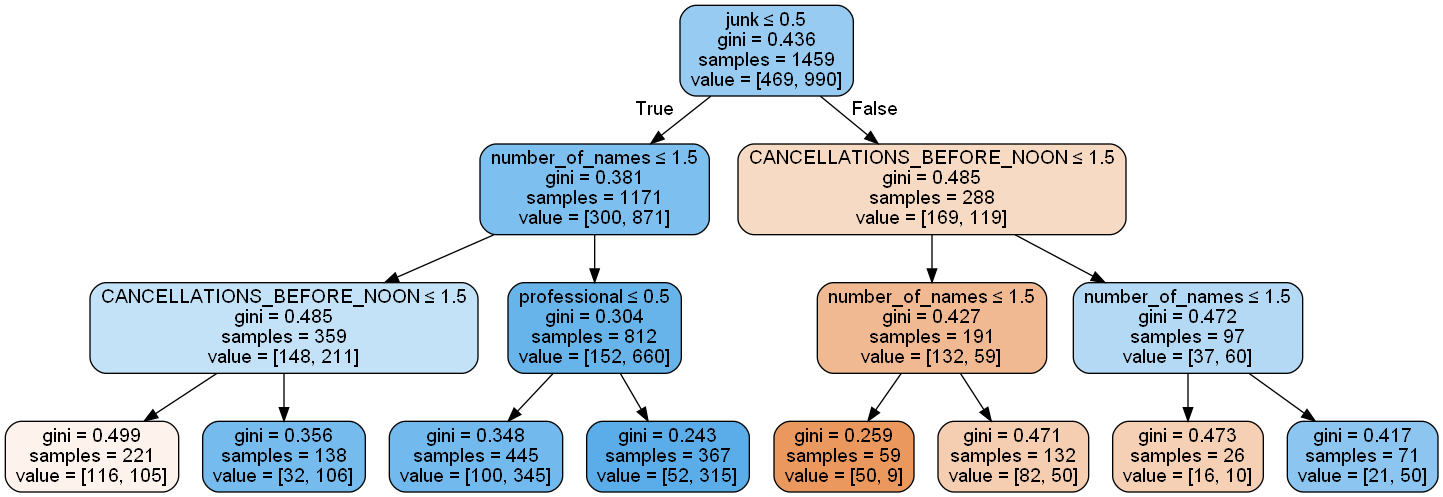

In [50]:
# calling display_tree
display_tree(tree       = tree_tuned_fit,
             feature_df = x_train)



<ipython-input-3-d3e8809fbf0a>:62: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  plt.yticks(pd.np.arange(n_features), train.columns)


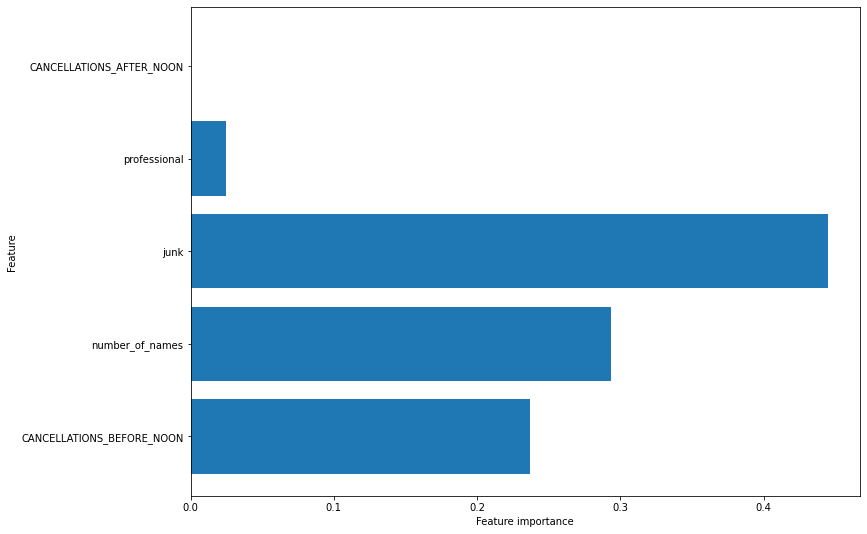

In [51]:
# plotting feature importance
plot_feature_importances(tree_tuned_fit,
                         train  = x_train,
                         export = False)

plt.tight_layout()
# NEW! Saving a figure as an image
plt.savefig(fname = 'Feature Importance.png')


### Confusion Matrix

In [26]:
# unpacking the confusion matrix
tree_tuned_tn, \
tree_tuned_fp, \
tree_tuned_fn, \
tree_tuned_tp = confusion_matrix(y_true = y_test, y_pred = tree_tuned_pred).ravel()

# printing each result one-by-one
print(f"""
True Negatives : {tree_tuned_tn}
False Positives: {tree_tuned_fp}
False Negatives: {tree_tuned_fn}
True Positives : {tree_tuned_tp}
""")


True Negatives : 95
False Positives: 61
False Negatives: 48
True Positives : 283



### Save the results

In [27]:
# declaring model performance objects
tree_train_acc = tree_tuned_fit.score(x_train, y_train).round(4)
tree_test_acc  = tree_tuned_fit.score(x_test, y_test).round(4)
tree_auc       = roc_auc_score(y_true  = y_test,
                               y_score = tree_tuned_pred).round(4)

# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'             : 'Tuned Tree',
                          'Training Accuracy'  : tree_train_acc,
                          'Testing Accuracy'   : tree_test_acc,
                          'AUC Score'          : tree_auc,
                          'Confusion Matrix'   : (tree_tuned_tn,
                                                  tree_tuned_fp,
                                                  tree_tuned_fn,
                                                  tree_tuned_tp)},
                          ignore_index = True)


# checking the results
model_performance


,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic Regression,0.6664,0.7382,0.7515,"(67, 89, 32, 299)"
1,Tuned Tree,0.7320,0.7402,0.7762,"(95, 61, 48, 283)"


## GBM 


### Using logit_sig variables

In [28]:
df_data   =  df.loc[ : , feature_dict['logit_sig']]
df_target =  df.loc[ : , 'CROSS_SELL_SUCCESS']

# train/test split
x_train, x_test, y_train, y_test = train_test_split(
                                                    df_data,
                                                    df_target,
                                                    random_state = 219,
                                                    test_size    = 0.25,
                                                    stratify     = df_target)

### Apply GBM with tuned hyperparameter

In [29]:
# INSTANTIATING the model object without hyperparameters
gbm_tuned = GradientBoostingClassifier(loss           = 'exponential',
                                               learning_rate = 0.2, 
                                               n_estimators  = 200,
                                               criterion     = 'friedman_mse',
                                               max_depth     = 2,
                                               warm_start    = False,
                                               random_state  = 219)


# FIT step is needed as we are not using .best_estimator
gbm_tuned_fit = gbm_tuned.fit(x_train, y_train)


# PREDICTING based on the testing set
gbm_tuned_pred = gbm_tuned.predict(x_test)


# SCORING the results
print('Training ACCURACY:', gbm_tuned_fit.score(x_train, y_train).round(4))
print('Testing ACCURACY :', gbm_tuned_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = gbm_tuned_pred.round(4)))

Training ACCURACY: 0.7786
Testing ACCURACY : 0.7823
AUC Score        : 0.7144821442404524


### Confusion Matrix

In [30]:
# unpacking the confusion matrix
gbm_tuned_tn, \
gbm_tuned_fp, \
gbm_tuned_fn, \
gbm_tuned_tp = confusion_matrix(y_true = y_test, y_pred = gbm_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {gbm_tuned_tn}
False Positives: {gbm_tuned_fp}
False Negatives: {gbm_tuned_fn}
True Positives : {gbm_tuned_tp}
""")


True Negatives : 82
False Positives: 74
False Negatives: 32
True Positives : 299



### Save the results

In [31]:
# SCORING the model
tuned_gbm_train_acc = gbm_tuned_fit.score(x_train, y_train).round(4)
tuned_gbm_test_acc  = gbm_tuned_fit.score(x_test, y_test).round(4)
tuned_gbm_auc       = roc_auc_score(y_true  = y_test,
                              y_score = gbm_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'       : 'Tuned GBM',
                          'Training Accuracy' : tuned_gbm_train_acc,
                          'Testing Accuracy'  : tuned_gbm_test_acc,
                          'AUC Score'         : tuned_gbm_auc,
                          'Confusion Matrix'  : (gbm_tuned_tn,
                                                 gbm_tuned_fp,
                                                 gbm_tuned_fn,
                                                 gbm_tuned_tp)},
                          ignore_index = True)


# checking the results
model_performance


,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic Regression,0.6664,0.7382,0.7515,"(67, 89, 32, 299)"
1,Tuned Tree,0.7320,0.7402,0.7762,"(95, 61, 48, 283)"
2,Tuned GBM,0.7145,0.7786,0.7823,"(82, 74, 32, 299)"


## Random Forest 

### Using logit_sig 

In [32]:
df_data   =  df.loc[ : , feature_dict['logit_sig']]
df_target =  df.loc[ : , 'CROSS_SELL_SUCCESS']

# train/test split
x_train, x_test, y_train, y_test = train_test_split(
                                                    df_data,
                                                    df_target,
                                                    random_state = 219,
                                                    test_size    = 0.25,
                                                    stratify     = df_target)

In [ ]:
# declaring a hyperparameter space
estimator_space  = pd.np.arange(100, 1100, 250)
leaf_space       = pd.np.arange(1, 30, 10)
criterion_space  = ['gini', 'entropy']
bootstrap_space  = [True, False]
warm_start_space = [True, False]


# creating a hyperparameter grid
param_grid = {'n_estimators'     : estimator_space,
              'min_samples_leaf' : leaf_space,
              'criterion'        : criterion_space,
              'bootstrap'        : bootstrap_space,
              'warm_start'       : warm_start_space}


# INSTANTIATING the model object without hyperparameters
forest_grid = RandomForestClassifier(random_state = 219)


# GridSearchCV object
forest_cv = RandomizedSearchCV(estimator           = forest_grid,
                               param_distributions = param_grid,
                               cv                  = 3,
                               n_iter              = 1000,
                               scoring             = make_scorer(roc_auc_score,
                                                     needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
forest_cv.fit(df_data, df_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", forest_cv.best_params_)
print("Tuned Training AUC:", forest_cv.best_score_.round(4))

In [ ]:
# best estimators based on RandomizedSearchCV
forest_cv.best_estimator_

### Apply Random Forest with tuned hyperparameter

In [33]:
# INSTANTIATING a random forest model with default values
rf_tuned = RandomForestClassifier(bootstrap=False, criterion='entropy',
                       min_samples_leaf=21, random_state=219, warm_start=True)

# FITTING the training data
rf_tuned_fit = rf_tuned.fit(x_train, y_train)


# PREDICTING based on the testing set
rf_tuned_pred = rf_tuned.predict(x_test)


# SCORING the results
print('Training ACCURACY:', rf_tuned_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', rf_tuned_fit.score(x_test, y_test).round(4))


# saving AUC score
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = rf_tuned_pred).round(4))

Training ACCURACY: 0.7724
Testing  ACCURACY: 0.7803
AUC Score        : 0.7011


### Confusion Matrix

In [34]:
# unpacking the confusion matrix
rf_tuned_tn, \
rf_tuned_fp, \
rf_tuned_fn, \
rf_tuned_tp = confusion_matrix(y_true = y_test, y_pred = rf_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {rf_tuned_tn}
False Positives: {rf_tuned_fp}
False Negatives: {rf_tuned_fn}
True Positives : {rf_tuned_tp}
""")


True Negatives : 75
False Positives: 81
False Negatives: 26
True Positives : 305



### Save the results

In [35]:
# declaring model performance objects
tuned_rf_train_acc = rf_tuned_fit.score(x_train, y_train).round(4)
tuned_rf_test_acc  = rf_tuned_fit.score(x_test, y_test).round(4)
tuned_rf_auc       = roc_auc_score(y_true  = y_test,
                                   y_score = rf_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'         : 'Tuned Random Forest',
                           'Training Accuracy'  : tuned_rf_train_acc,
                           'Testing Accuracy'   : tuned_rf_test_acc,
                           'AUC Score'          : tuned_rf_auc,
                           'Confusion Matrix'   : (rf_tuned_tn,
                                                   rf_tuned_fp,
                                                   rf_tuned_fn,
                                                   rf_tuned_tp)},
                          ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic Regression,0.6664,0.7382,0.7515,"(67, 89, 32, 299)"
1,Tuned Tree,0.7320,0.7402,0.7762,"(95, 61, 48, 283)"
2,Tuned GBM,0.7145,0.7786,0.7823,"(82, 74, 32, 299)"
3,Tuned Random Forest,0.7011,0.7724,0.7803,"(75, 81, 26, 305)"


# CONCLUSION
- My final model will be Tuned Decision Tree with AUC score at 0.732 
- The gap between Training and Testing Accuracy for all 4 models is acceptable (<0.05)